In [1]:
import os

# Third-party
import astropy.coordinates as coord
from astropy.io import ascii
import astropy.table as atbl
import astropy.units as u
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('notebook.mplstyle')
%matplotlib inline

In [2]:
tycho2_path = os.path.abspath("../data/tycho2.hdf5")
exoplanets_path = os.path.abspath("../data/planets.csv")

In [3]:
if not os.path.exists(tycho2_path):
    print("Please download the tycho2 HDF5 file (it's ~500 MB), e.g.:")
    _data_path = os.path.abspath(os.path.join(os.getcwd(), "..", "data"))
    print("    wget -P {} {}".format(_data_path, "http://s3.adrian.pw/tycho2.hdf5"))
    
if not os.path.exists(exoplanets_path):
    print("Please download the exoplanets CSV file (it's ~1 MB), e.g.:")
    _data_path = os.path.abspath(os.path.join(os.getcwd(), "..", "data"))
    print("    wget -P {} {}".format(_data_path, "http://s3.adrian.pw/planets.hdf5"))

In [4]:
exoplanets = ascii.read(exoplanets_path, header_start=70, data_start=71)
len(exoplanets)

3301

In [5]:
print(exoplanets.colnames)

['rowid', 'pl_hostname', 'pl_letter', 'pl_discmethod', 'pl_pnum', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_orbincl', 'pl_orbinclerr1', 'pl_orbinclerr2', 'pl_orbincllim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_dens', 'pl_denserr1', 'pl_denserr2', 'pl_denslim', 'pl_ttvflag', 'pl_kepflag', 'pl_k2flag', 'pl_nnotes', 'ra_str', 'ra', 'dec_str', 'dec', 'st_dist', 'st_disterr1', 'st_disterr2', 'st_distlim', 'st_optmag', 'st_optmagerr', 'st_optmaglim', 'st_optmagblend', 'st_optband', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_teffblend', 'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_massblend', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim', 'st_radblend', 'rowupdate']


Get coordinate objects for the two catalogs

In [6]:
tycho2 = atbl.Table.read(tycho2_path)

ra = tycho2['RAmdeg'][tycho2['pflag'].astype(str) == ' ']
dec = tycho2['DEmdeg'][tycho2['pflag'].astype(str) == ' ']
tycho2_c = coord.SkyCoord(ra=ra*u.degree, dec=dec*u.degree)

In [7]:
exoplanets['ra'].min(), exoplanets['ra'].max()

(0.36214200000000002, 359.97430400000002)

In [8]:
exoplanets_c = coord.SkyCoord(ra=exoplanets['ra']*u.degree, dec=exoplanets['dec']*u.degree)

In [9]:
idx,sep,_ = exoplanets_c.match_to_catalog_sky(tycho2_c)

In [10]:
cut = sep < 2*u.arcsecond
match_exop = exoplanets[cut]
match_idx = idx[cut]
len(match_idx)

755

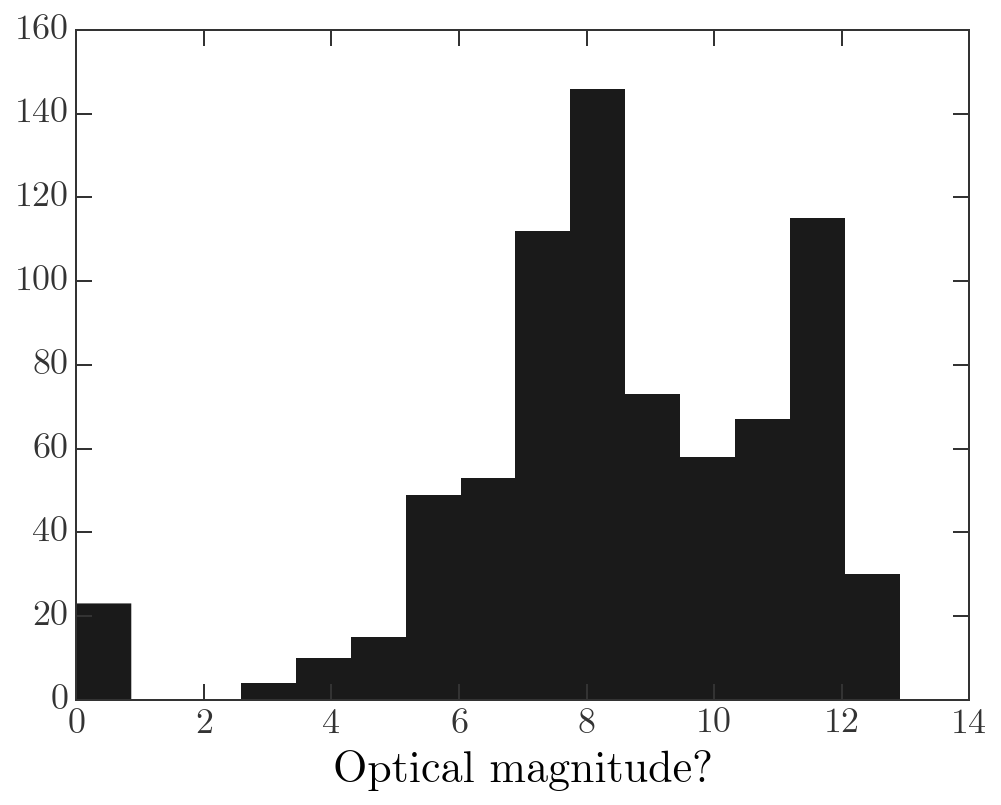

In [11]:
plt.figure(figsize=(8,6))
plt.hist(match_exop['st_optmag'], bins=15)
plt.xlabel('Optical magnitude?')